# Visualisation of 3D model output

**Date:** 2025-12-03

**Authors:** Damien Bouffard,

**Summary:** This notebook provides tools to visualise 3D lake model output .

- `plot_alplakes_pcolormesh(data, ...)` — plot a map of temperature and current for a given lake at a given time and depth .
- `plot_temperature_timeseries(data, ...)` — plot a time serie of temperature for a given lake at a given location (x,y,z) over a given period.
- `plot_alplakes_transect(data,...)` — plot a transect for a given lake at a given time. Transect is defined with lat, lon coordinates
- `plot_alplakes_transect_timeseries(data, ...` — plot a transect for a given lake over a given period. Transect is defined with lat, lon coordinates.


**Remaining tasks:** 
- check transect over more than 2 coordinates
- add map bottom temperature
- add layer averaged temperature
- save figures and dataset

In [7]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
from datetime import datetime


from functions_D3D import fetch_and_save_alplakes_data_map, fetch_and_save_alplakes_point_data, plot_temperature_timeseries, plot_alplakes_pcolormesh

from functions_D3D import fetch_and_save_alplakes_data_transect, plot_alplakes_transect, plot_alplakes_transect_timeseries



Output file: ../data/Zurich/zurich_202510231500__1m_delft3d-flow.json
Fetching data from API...
✓ Data fetched successfully!
  Response length: 223892 characters
✓ Data saved to: ../data/Zurich/zurich_202510231500__1m_delft3d-flow.json

Data summary:
  Time: 2025-10-23T15:00:00+00:00
  Depth: 0.9000000357627869 m
  Variables: ['temperature', 'u', 'v']


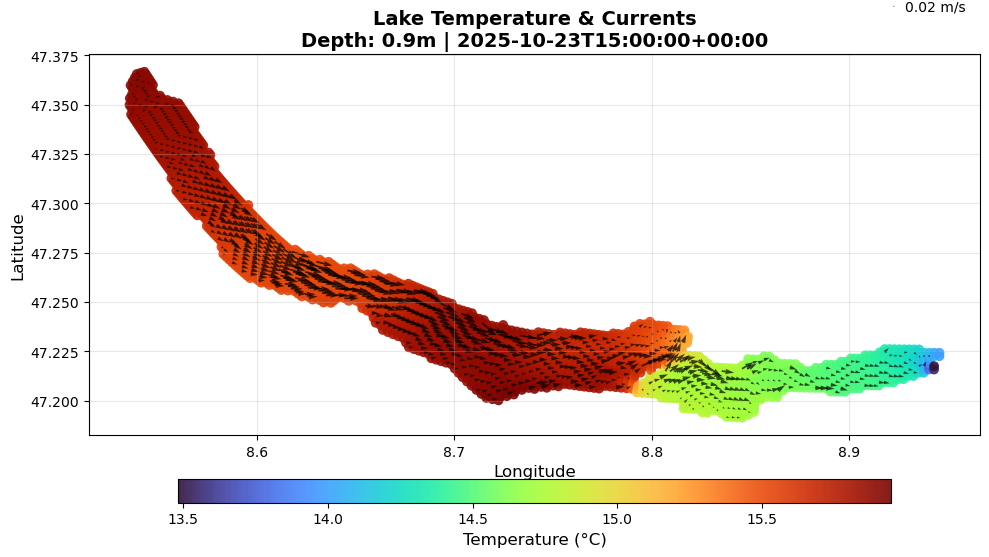

In [9]:
data = fetch_and_save_alplakes_data_map(
     lake='zurich',
     date='202510231500',
     depth=1,
     variables=['temperature', 'velocity']
)
plot_alplakes_pcolormesh(data, skip=3, figsize=(10, 6), plot_temp=True, plot_velocity=True, cmap='turbo', quiver_scale=10, quiver_width=0.002)
plt.show()

API URL: https://alplakes-api.eawag.ch/simulations/point/delft3d-flow/zurich/202304050300/202304112300/1/46.5/6.67?variables=temperature&variables=velocity
Output file: ../data/Zurich/zurich_point_202304050300_202304112300_1m.json
Fetching data from API...
✓ Data fetched successfully!
  Response length: 3328 characters
✓ Data saved to: ../data/Zurich/zurich_point_202304050300_202304112300_1m.json

Data summary:
  Time steps: 55
  Location: (47.274357960244316, 8.583006092604)
  Depth: 0.9000000357627869 m
  Distance from requested point: 168956.87987008158 m
  Variables: ['temperature', 'u', 'v']
  Time range: 2023-04-05T03:00:16+00:00 to 2023-04-11T20:59:44+00:00


(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Water Temperature Time Series (Depth: 0.90 m)'}, xlabel='Date', ylabel='Temperature (°C)'>)

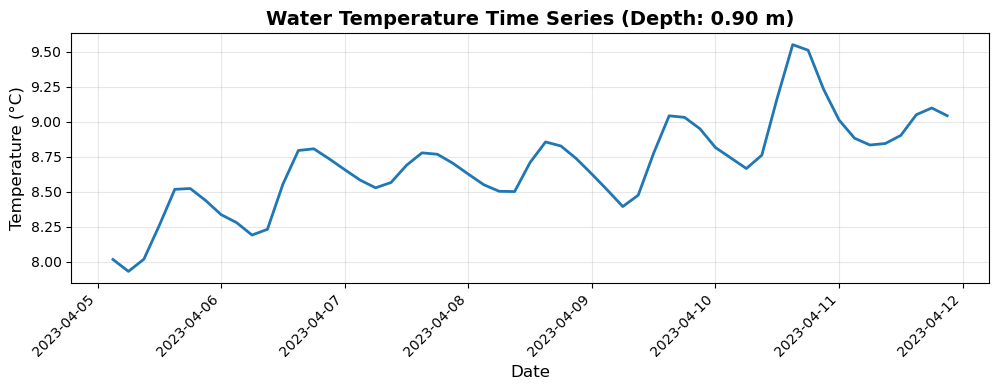

In [10]:
# Usage example
data = fetch_and_save_alplakes_point_data(
     lake='zurich',
     start_time='202304050300',
     end_time='202304112300',
     depth=1,
     lat=46.5,
     lon=6.67,
     variables=['temperature', 'velocity']
 )
plot_temperature_timeseries(data, figsize=(10, 4))

In [11]:
data = fetch_and_save_alplakes_data_transect(
     lake='geneva'
     start_time='202510231500'
     end_time='202510241500'
     lat=['46.37', '46.54']
     lon=['6.56', '6.54'] 
     variables=['temperature', 'velocity']
     model='delft3d-flow'
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3014592577.py, line 2)

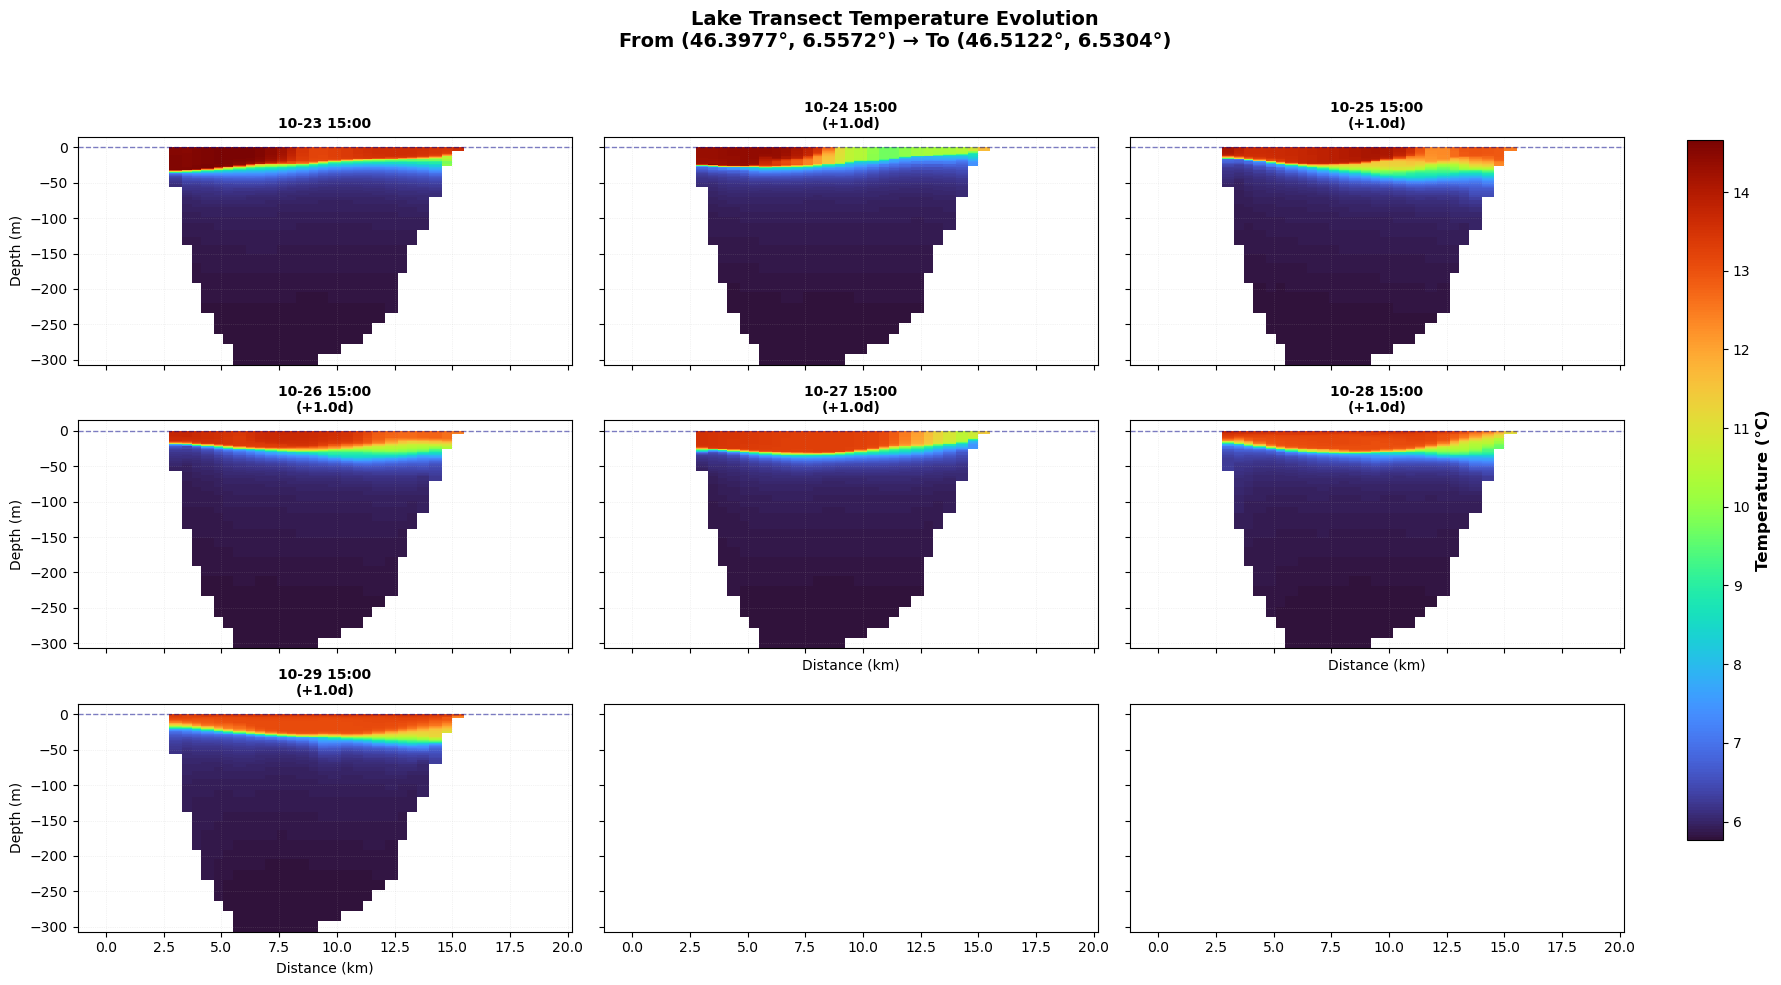

In [5]:
data = fetch_and_save_alplakes_data_transect(
    lake='geneva',
    start_time='202510231500',
    end_time='202510301500',
    lat=['46.37', '46.54'],
    lon=['6.56', '6.54'],
    variables=['temperature', 'velocity'],
    model='delft3d-flow')

fig, axes = plot_alplakes_transect_timeseries(
    data,
    time_range=('2025-10-23 15:00', '2025-10-30 09:00'),
    time_step='24h',  # Every 6 hours with Δt shown
    cmap='turbo')
plt.show()

/Users/bouffada/Documents/Git/Peak_alplakes/scripts/functions_D3D.py:1065: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.96])


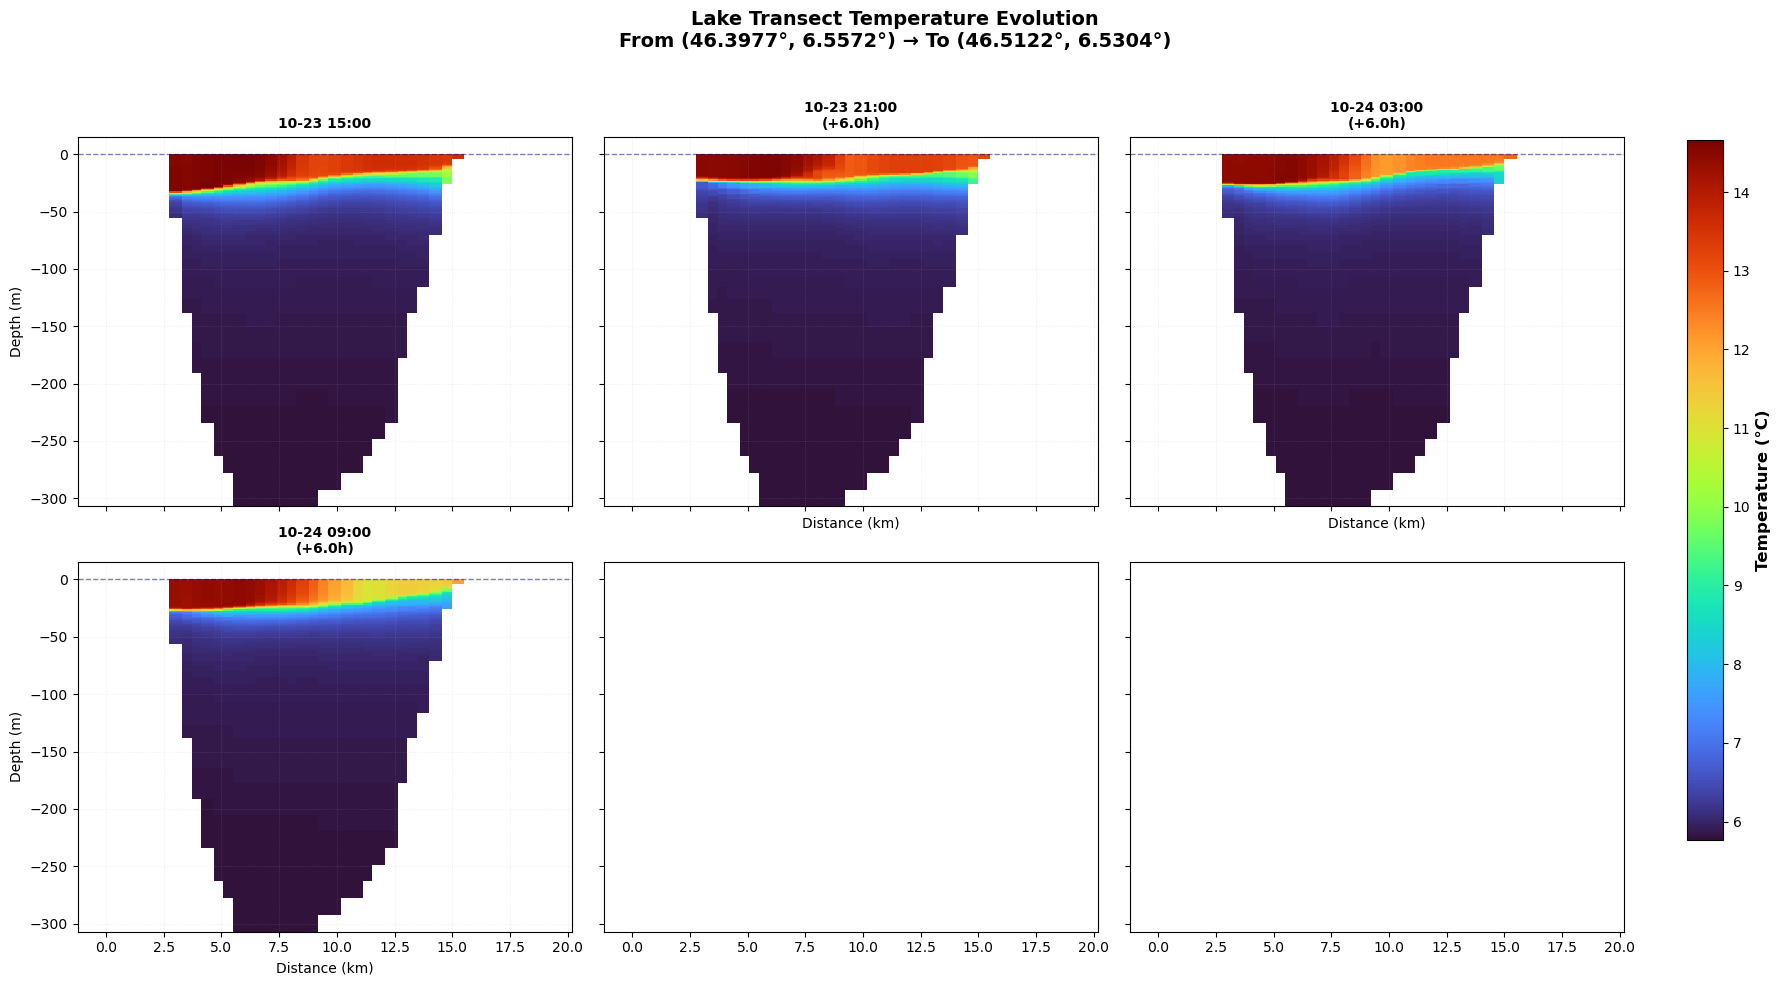

In [12]:
data = fetch_and_save_alplakes_data_transect(
    lake='geneva',
    start_time='202510231500',
    end_time='202510301500',
    lat=['46.37', '46.54'],
    lon=['6.56', '6.54'],
    variables=['temperature', 'velocity'],
    model='delft3d-flow')

fig, axes = plot_alplakes_transect_timeseries(
    data,
    time_range=('2025-10-23 15:00', '2025-10-24 09:00'),
    time_step=2,  
    cmap='turbo')
plt.show()

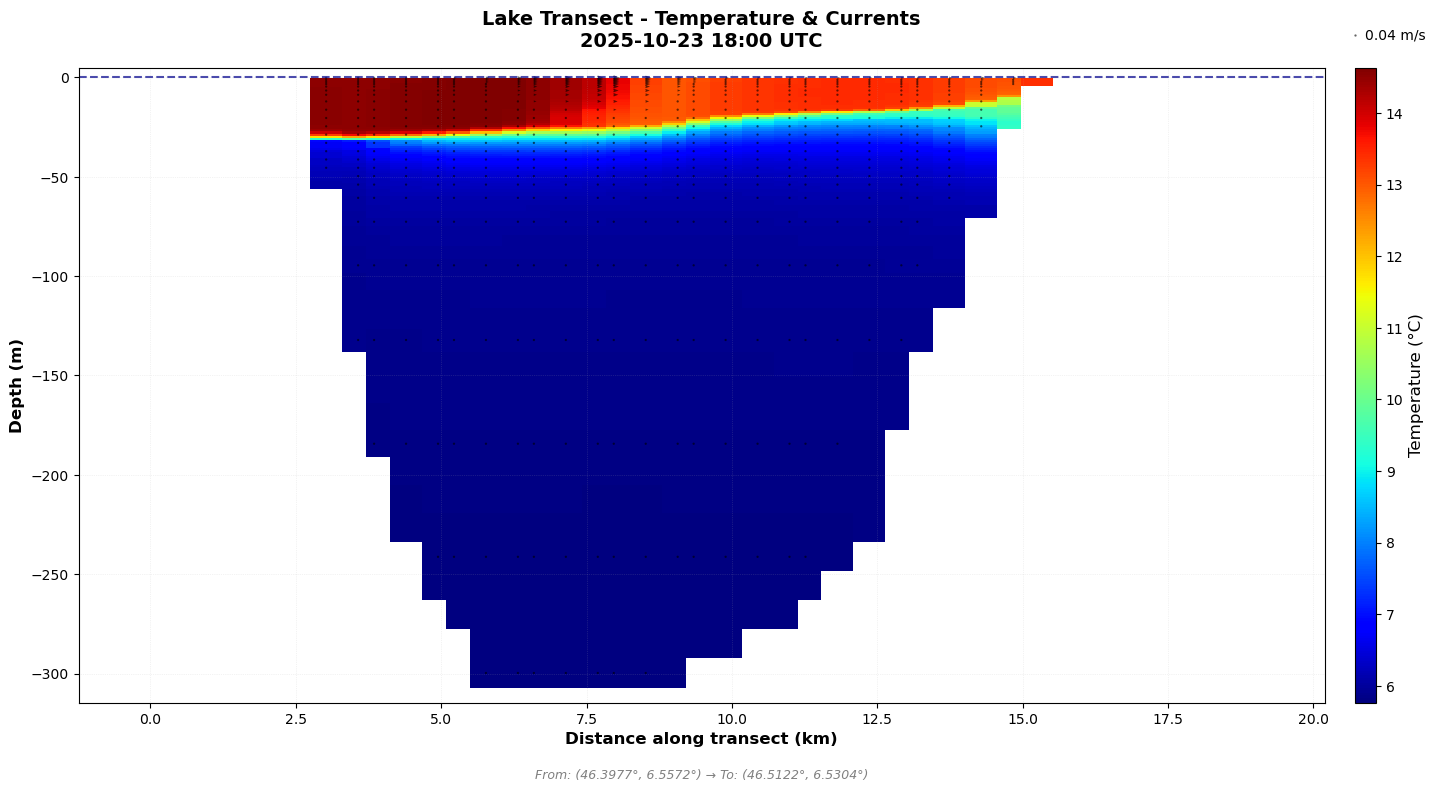

In [13]:
data = fetch_and_save_alplakes_data_transect(
    lake='geneva',
    start_time='202510231500',
    end_time='202510241500',
    lat=['46.37', '46.54'],
    lon=['6.56', '6.54'],
    variables=['temperature', 'velocity'],
    model='delft3d-flow')

fig, ax = plot_alplakes_transect(data, time='2025-10-23 18:00:00')
plt.show()